# MDP assignment

First of all I am running the primary code and visualize the average_cumulative_reward in order to see that what happens in this algorithm.

After that I will add the described things in the description of the assignment and check the effect and the improvement of each change.

In [1]:
def running_average(nums):
    result = []
    sum_so_far = 0
    for i, num in enumerate(nums):
        sum_so_far += num
        result.append(sum_so_far / (i + 1))
    return result

In [2]:
import random

from ice import *
import matplotlib.pyplot as plt
import numpy as np

def average_cumulative_reward_visualization(average_cumulative_rewards, timesteps):
    window_size = 1000
    windowed_rewards = [np.mean(average_cumulative_rewards[i:i+window_size])
                        for i in range(0, len(average_cumulative_rewards), window_size)]
    plt.plot(windowed_rewards)
    plt.xlabel('Time')
    plt.ylabel('Average cumulative reward')
    plt.title('Average cumulative reward ' + str(timesteps) + " EPISODES")
    plt.rcParams['figure.figsize'] = [20, 20]
    plt.show()

In [3]:
def average_of_average_cumulative_reward_visualization(average_cumulative_rewards, timesteps):
    x = running_average(average_cumulative_rewards)
    plt.plot(running_average(x))
    plt.xlabel('Time')
    plt.ylabel('Average cumulative reward')
    plt.title('Average of average cumulative reward ' + str(timesteps) + " EPISODES until each episod")
    plt.rcParams['figure.figsize'] = [20, 20]
    plt.show()

## Primary code
This code is the primary code provided in the assignment. Let see what happens.

0 100.0 5.0
10000 100.0 21.822556466822963
20000 -10.0 21.03510120496576
30000 -10.0 34.54734865768545
40000 -10.0 12.463712103478185
50000 -10.0 29.66632838041863
60000 100.0 32.41236554956304
70000 -10.0 28.544705990109918
80000 -10.0 15.055135354450233
90000 -10.0 13.361571435064317
0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 


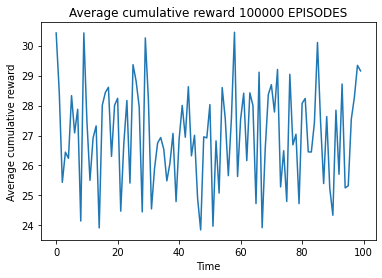

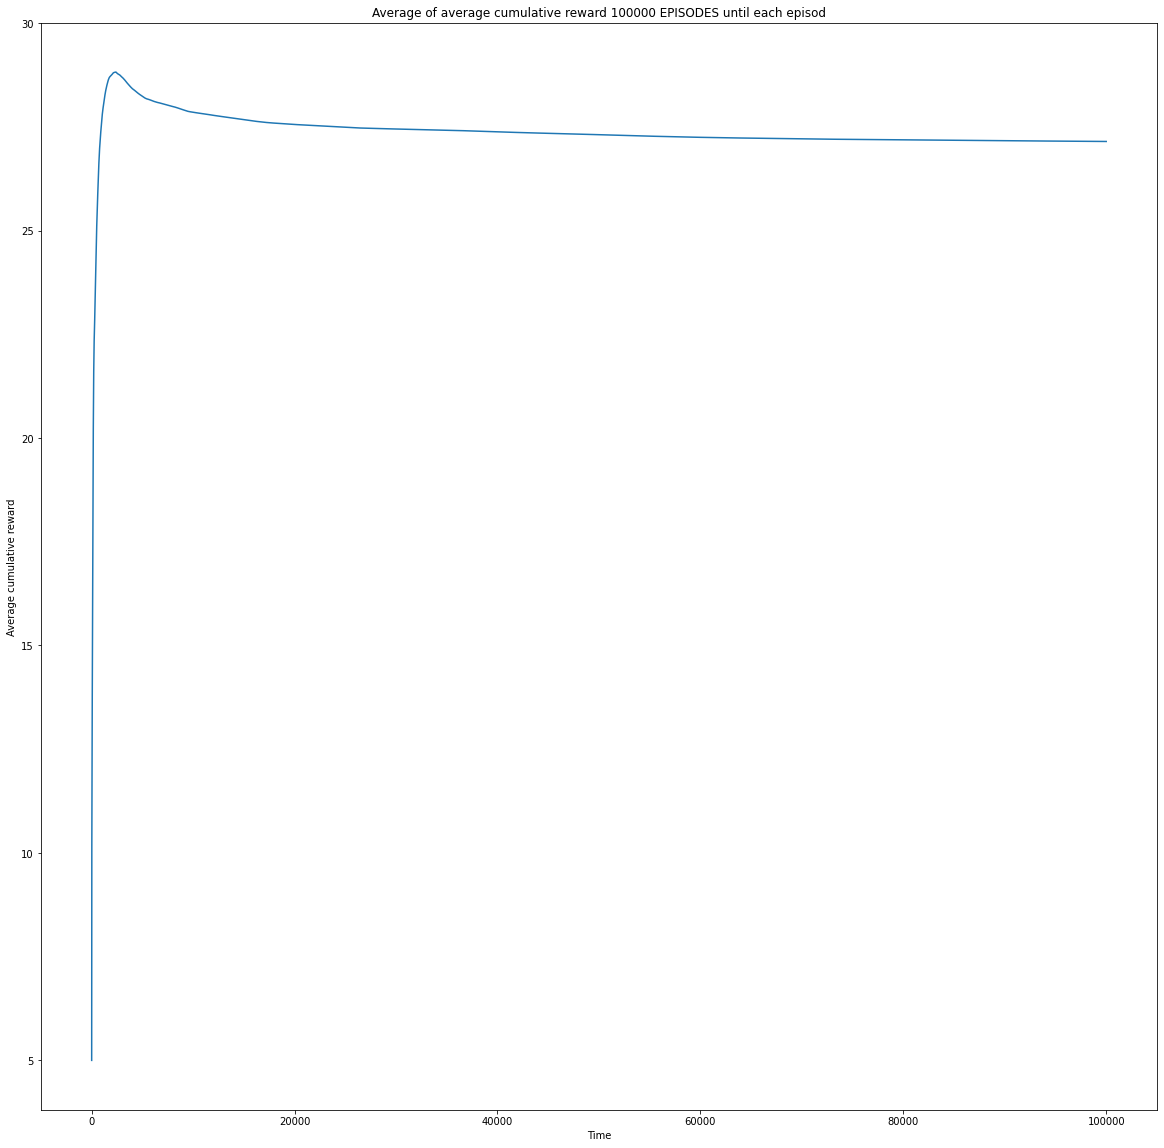

In [4]:
from ice import *
EPISODES = 100000
EPSILON = 0.1
GAMMA = 0.9
LEARNING_RATE = 0.1
average_cumulative_rewards = []

def argmax(l):
    """ Return the index of the maximum element of a list """
    return max(enumerate(l), key=lambda x:x[1])[0]

def main():
    env = Ice()
    average_cumulative_reward = 0.0
    # Q-table, 4x4 states, 4 actions per state
    qtable = [[0., 0., 0., 0.] for state in range(4*4)]
    # Loop over episodes
    for i in range(EPISODES):
        state = env.reset()
        terminate = False
        cumulative_reward = 0.0
        # Loop over time-steps
        while not terminate:
            # Compute what the greedy action for the current state is
            a = 0
            # Sometimes, the agent takes a random action, to explore the environment
            if random.random() < EPSILON:
                a = random.randrange(4)
            # Perform the action
            next_state, r, terminate = env.step(a)
            # Update the Q-Table
            qtable[state][a] = 0.0
            # Update statistics
            cumulative_reward += r
            state = next_state
        # Per-episode statistics
        average_cumulative_reward *= 0.95
        average_cumulative_reward += 0.05 * cumulative_reward
        average_cumulative_rewards.append(average_cumulative_reward)
        if i%(EPISODES/10) == 0:
            print(i, cumulative_reward, average_cumulative_reward)
    # Print the value table
    for y in range(4):
        for x in range(4):
            print('%03.3f ' % max(qtable[y*4 + x]), end='')
        print()
    average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    average_of_average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
if __name__ == '__main__':
    main()

As you can see there is no sign of learning and because there is not any. I also implemented a function for ploting. In this function we average every 1000 point and show them in order to have a more clear plot.
## Add Q learning

0 -10.0 -0.5 0.1
10000 100.0 86.78097951825097 0.1
20000 100.0 78.55904607599098 0.1
30000 100.0 95.26435662430859 0.1
40000 100.0 92.94144150824 0.1
50000 120.0 99.94097057281806 0.1
60000 100.0 96.5086134113692 0.1
70000 100.0 84.40593884552129 0.1
80000 100.0 92.54352115805166 0.1
90000 100.0 93.67776849802428 0.1
83.825 90.515 100.000 0.000 
74.642 0.000 90.000 0.000 
67.882 88.974 81.542 0.000 
61.020 0.000 0.000 0.000 


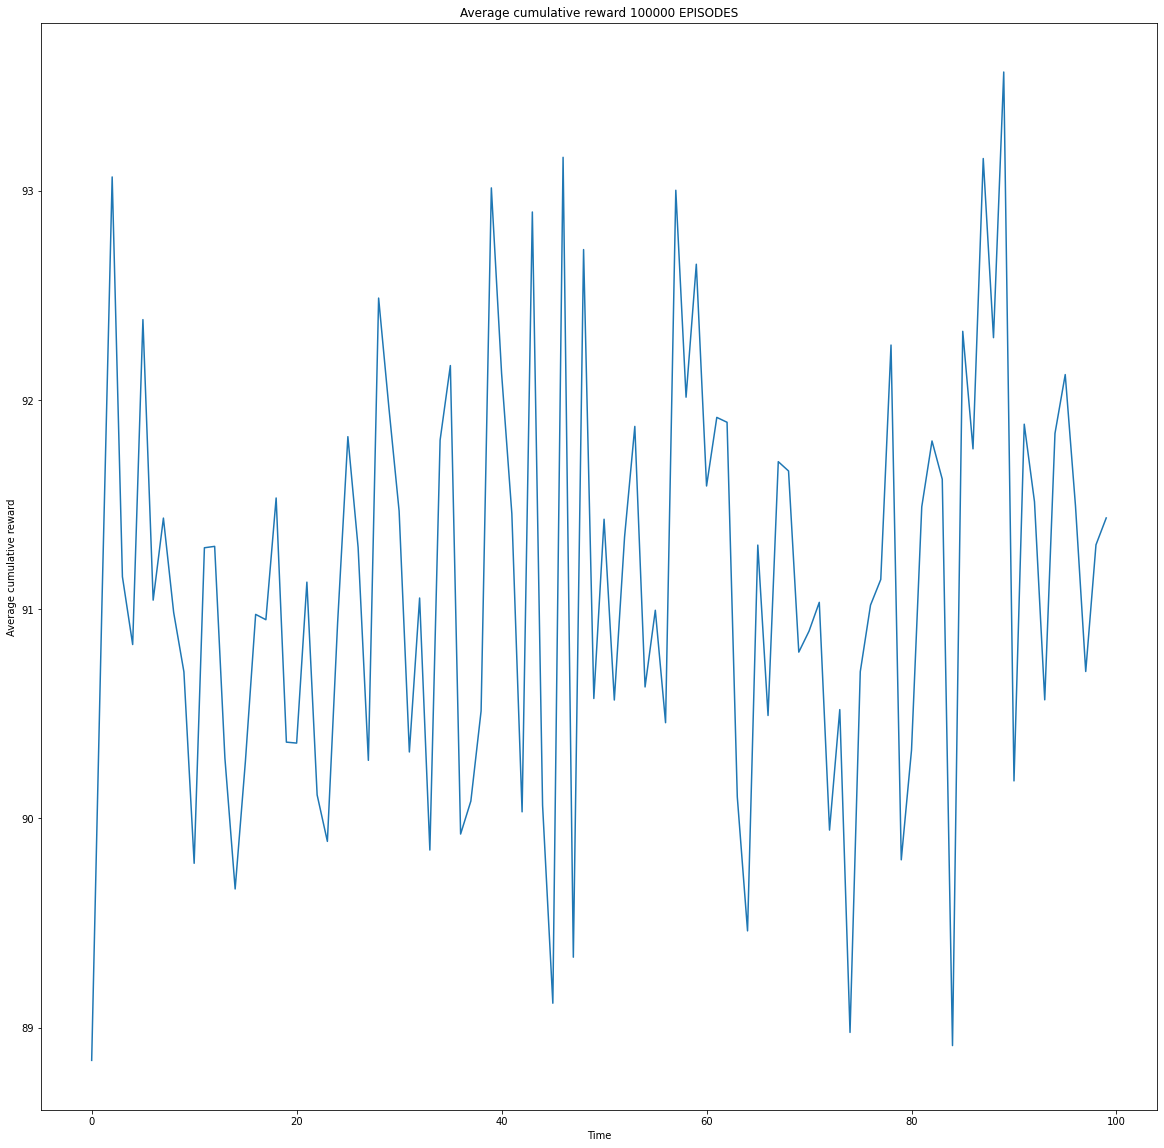

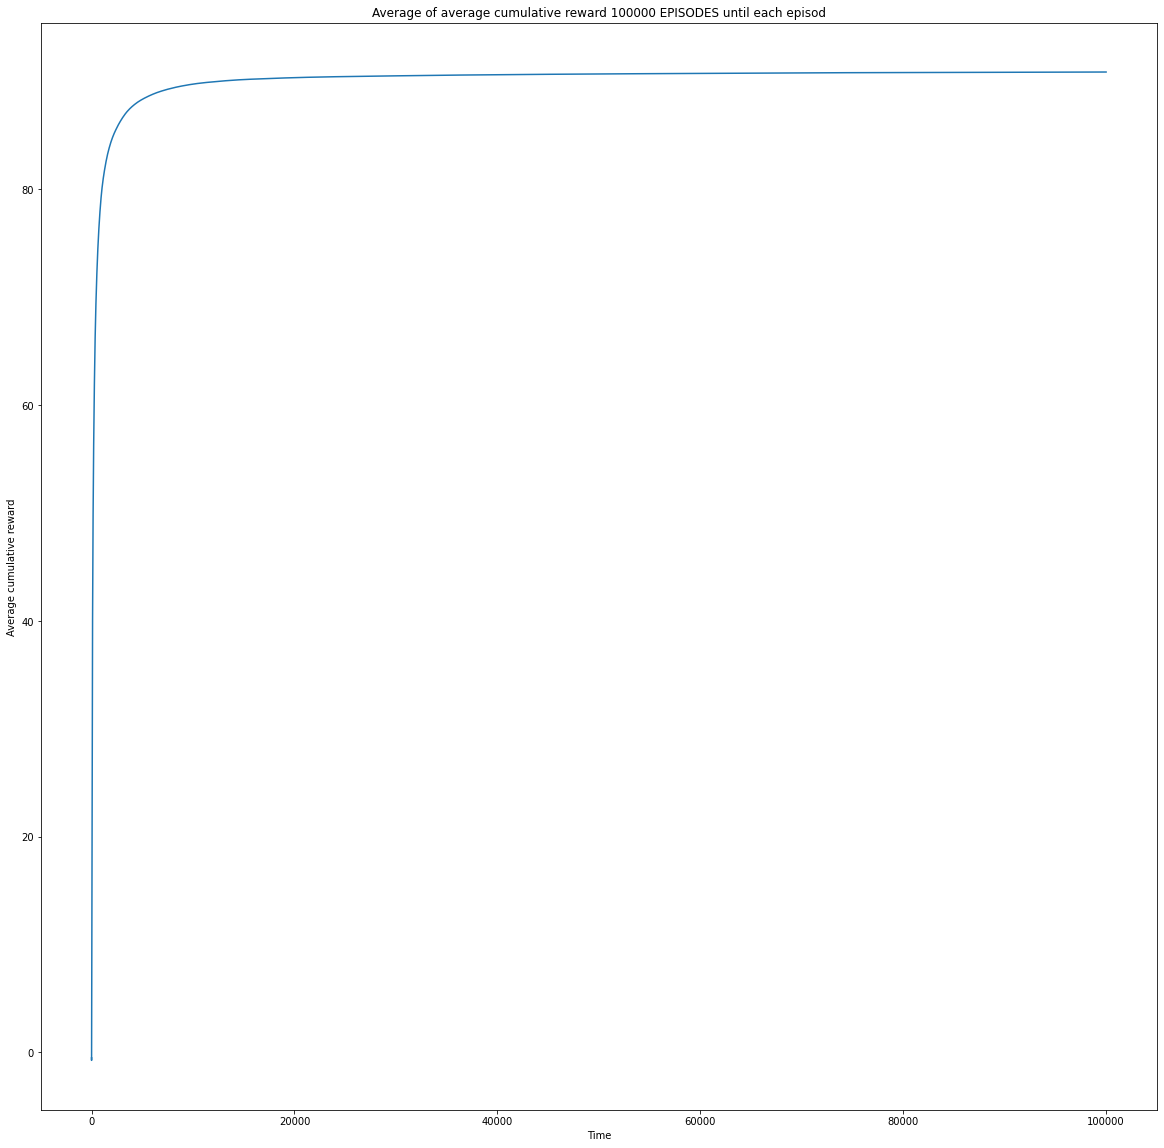

In [5]:
EPISODES = 100000
EPSILON = 0.1
GAMMA = 0.9
LEARNING_RATE = 0.1
average_cumulative_rewards = []

def argmax(l):
    """ Return the index of the maximum element of a list
    """
    return max(enumerate(l), key=lambda x:x[1])[0]

def main():
    env = Ice()
    average_cumulative_reward = 0.0

    # Q-table, 4x4 states, 4 actions per state
    qtable = [[0., 0., 0., 0.] for state in range(4*4)]

    # Loop over episodes
    for i in range(EPISODES):
        state = env.reset()
        terminate = False
        cumulative_reward = 0.0

        # Loop over time-steps
        while not terminate:
            # Compute what the greedy action for the current state is
            # UPDATED: We choose the best action in a state based on the q tabla
            a = argmax(qtable[state])

            # Sometimes, the agent takes a random action, to explore the environment
            if random.random() < EPSILON:
                a = random.randrange(4)

            # Perform the action
            next_state, r, terminate = env.step(a)

            # Update the Q-Table
            # UPDATED:
            Next_Best_Action = argmax(qtable[next_state])
            qtable[state][a] = qtable[state][a] + LEARNING_RATE * (r + GAMMA * qtable[next_state][Next_Best_Action] - qtable[state][a])

            # Update statistics
            cumulative_reward += r
            state = next_state

        # Per-episode statistics
        average_cumulative_reward *= 0.95
        average_cumulative_reward += 0.05 * cumulative_reward
        average_cumulative_rewards.append(average_cumulative_reward)
        if i % (EPISODES / 10) == 0:
            print(i, cumulative_reward, average_cumulative_reward, EPSILON)

    # Print the value table
    for y in range(4):
        for x in range(4):
            print('%03.3f ' % max(qtable[y*4 + x]), end='')

        print()

    average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    average_of_average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    
if __name__ == '__main__':
    main()


This one is looking better with higher values but because epsilon is very small and does not change the learning is not visible in the plot and also its limited.
## Add Epsilon decay
In this part I applied the epsilon decay with DECAY = 0.9999, min_EPSILON = 0.1 and primary EPSILON = 1. 

0 -10.0 -0.5 0.9999
10000 100.0 39.40450960190418 0.3678242603283259
20000 100.0 82.414987282867 0.13530821730781062
30000 100.0 93.52212679074809 0.1
40000 100.0 98.46170136114613 0.1
50000 100.0 94.40970568147799 0.1
60000 100.0 95.58614730043753 0.1
70000 -10.0 90.98504013381631 0.1
80000 100.0 85.21149469119152 0.1
90000 120.0 97.80962005966929 0.1
83.107 90.874 100.000 0.000 
74.408 0.000 90.000 0.000 
66.260 74.241 81.460 0.000 
59.521 0.000 0.000 0.000 


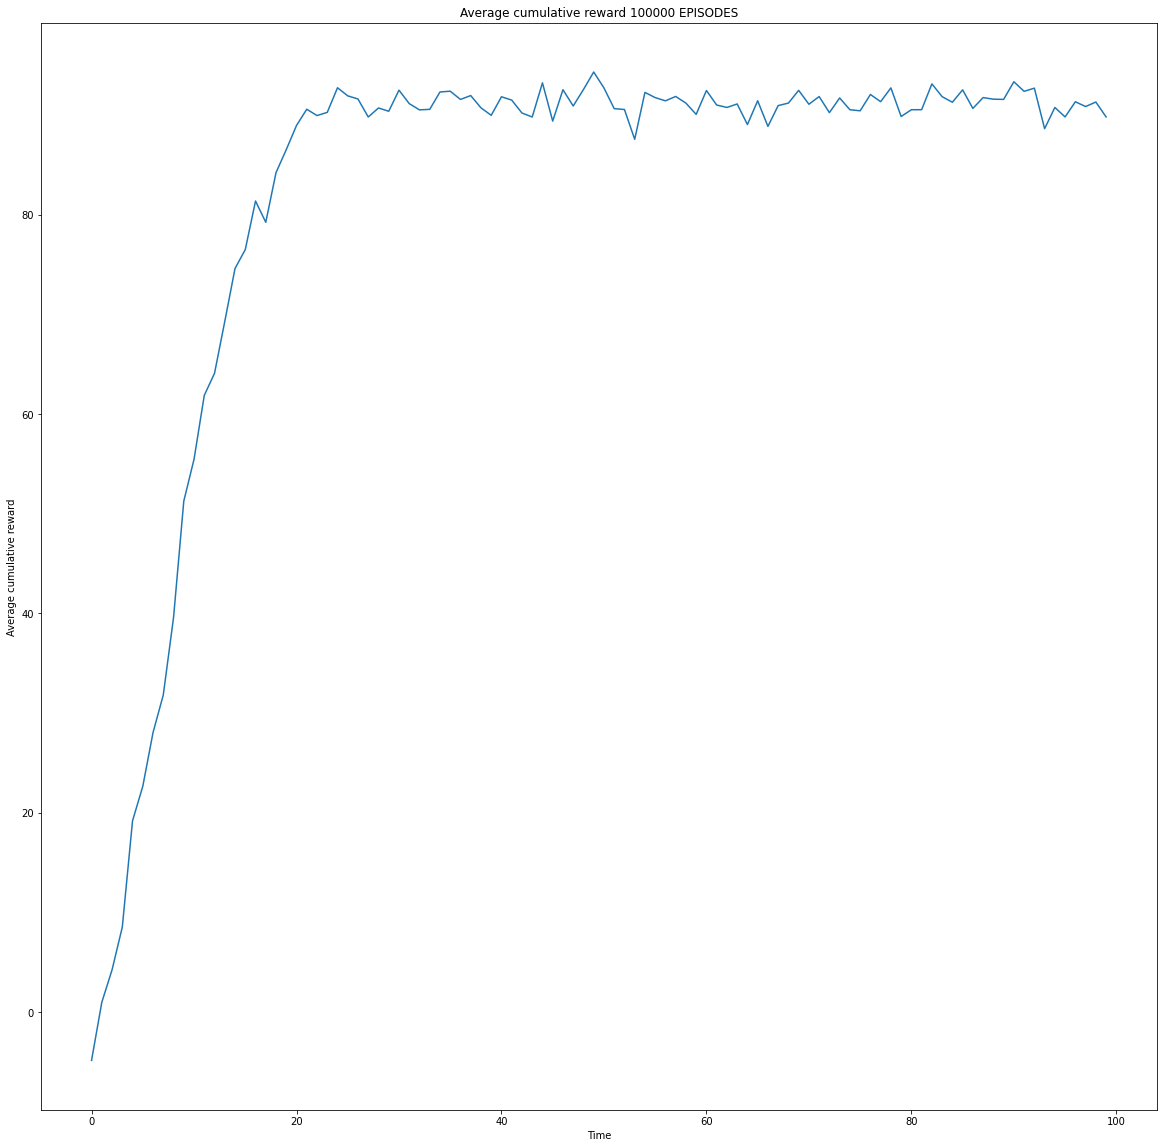

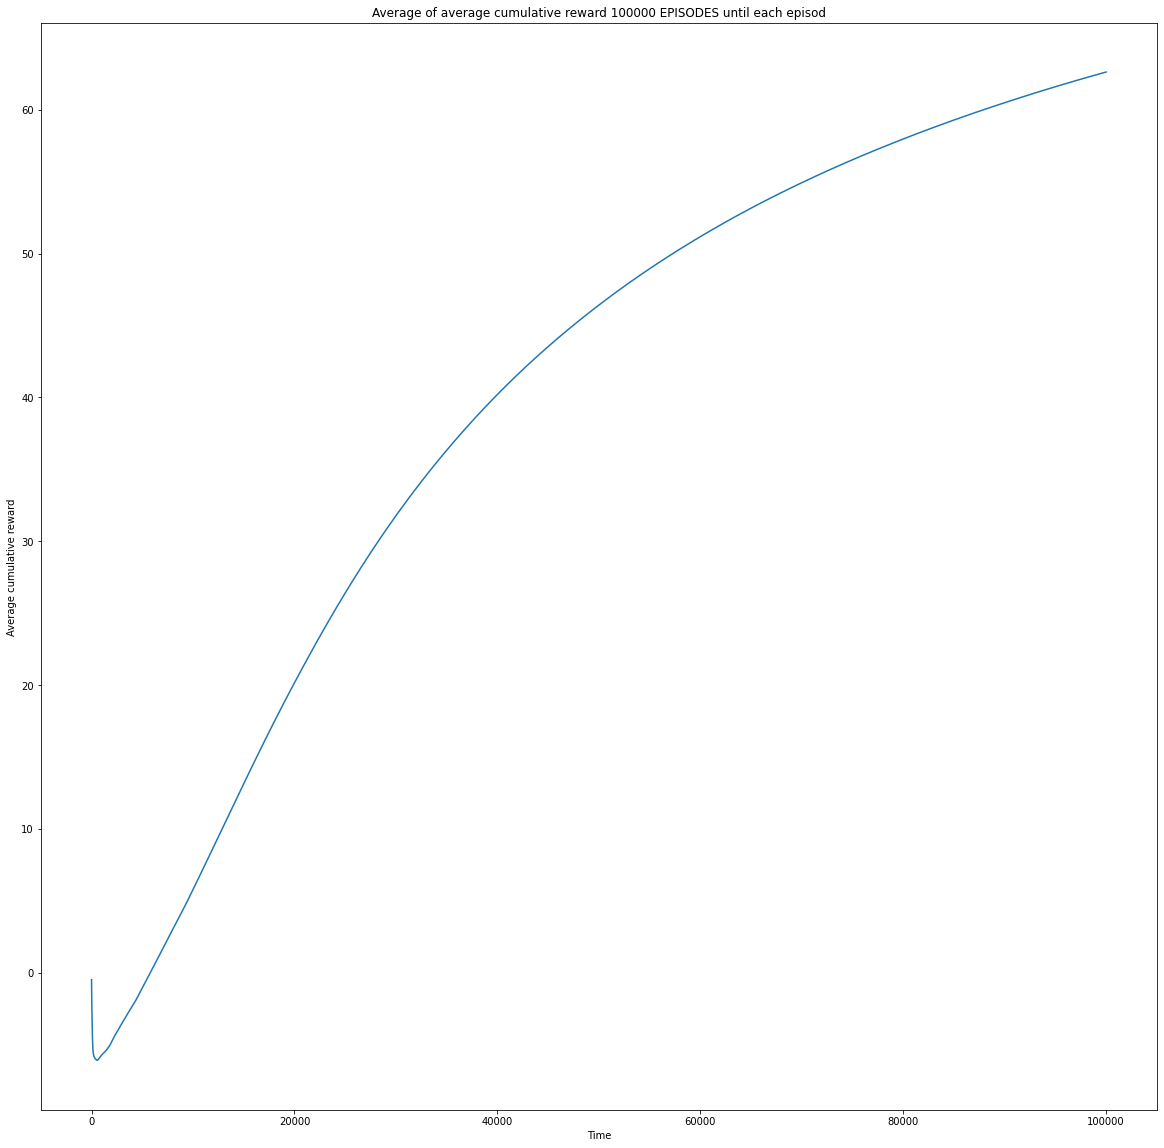

In [6]:
EPISODES = 100000
EPSILON = 1
min_EPSILON = 0.1
DECAY = 0.9999
GAMMA = 0.9
LEARNING_RATE = 0.1
average_cumulative_rewards = []

def argmax(l):
    """ Return the index of the maximum element of a list
    """
    return max(enumerate(l), key=lambda x:x[1])[0]

def main():
    env = Ice()
    average_cumulative_reward = 0.0

    # Q-table, 4x4 states, 4 actions per state
    qtable = [[0., 0., 0., 0.] for state in range(4*4)]

    # Loop over episodes
    for i in range(EPISODES):
        state = env.reset()
        terminate = False
        cumulative_reward = 0.0

        global EPSILON
        EPSILON = max(min_EPSILON, EPSILON*DECAY)

        # Loop over time-steps
        while not terminate:
            # Compute what the greedy action for the current state is
            # UPDATED: We choose the best action in a state based on the q tabla
            a = argmax(qtable[state])

            # Sometimes, the agent takes a random action, to explore the environment
            if random.random() < EPSILON:
                a = random.randrange(4)

            # Perform the action
            next_state, r, terminate = env.step(a)

            # Update the Q-Table
            # UPDATED:
            Next_Best_Action = argmax(qtable[next_state])
            qtable[state][a] = qtable[state][a] + LEARNING_RATE * (r + GAMMA * qtable[next_state][Next_Best_Action] - qtable[state][a])

            # Update statistics
            cumulative_reward += r
            state = next_state

        # Per-episode statistics
        average_cumulative_reward *= 0.95
        average_cumulative_reward += 0.05 * cumulative_reward
        average_cumulative_rewards.append(average_cumulative_reward)
        if i % (EPISODES / 10) == 0:
            print(i, cumulative_reward, average_cumulative_reward, EPSILON)

    # Print the value table
    for y in range(4):
        for x in range(4):
            print('%03.3f ' % max(qtable[y*4 + x]), end='')

        print()

    average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    average_of_average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)

if __name__ == '__main__':
    main()


I also run the program for DECAY = 0.999999 and for 3000000 iteration and have the same results.

0 30.0 1.5 0.999999
30000 -10.0 -8.366810884578669 0.9704445485454593
60000 -10.0 -4.937164176867844 0.941763563565167
90000 -10.0 -5.724769583825754 0.9139302302107998
120000 30.0 0.990330988826849 0.8869194965784752
150000 -10.0 4.359316834303171 0.8607070511603203
180000 -10.0 3.4205537885808908 0.8352693009624697
210000 30.0 -0.8688476025429113 0.810583350269737
240000 -10.0 5.16799385181875 0.7866269800379648
270000 -10.0 10.236581425721715 0.7633786278952455
300000 100.0 15.548557302443166 0.7408173687344279
330000 -10.0 -1.8700647557097554 0.7189228958790044
360000 50.0 26.28369429448801 0.6976755028057985
390000 -10.0 1.9809491971158328 0.6770560654076723
420000 -10.0 31.33131976447983 0.6570460247805289
450000 -10.0 6.1543934641803695 0.6376273705190901
480000 10.0 20.042274998372676 0.6187826245062464
510000 -10.0 26.345619561564433 0.6004948251815632
540000 -10.0 31.44100272385009 0.582747512274721
570000 -10.0 6.9890669216479235 0.5655247119901355
600000 -10.0 30.8267880813

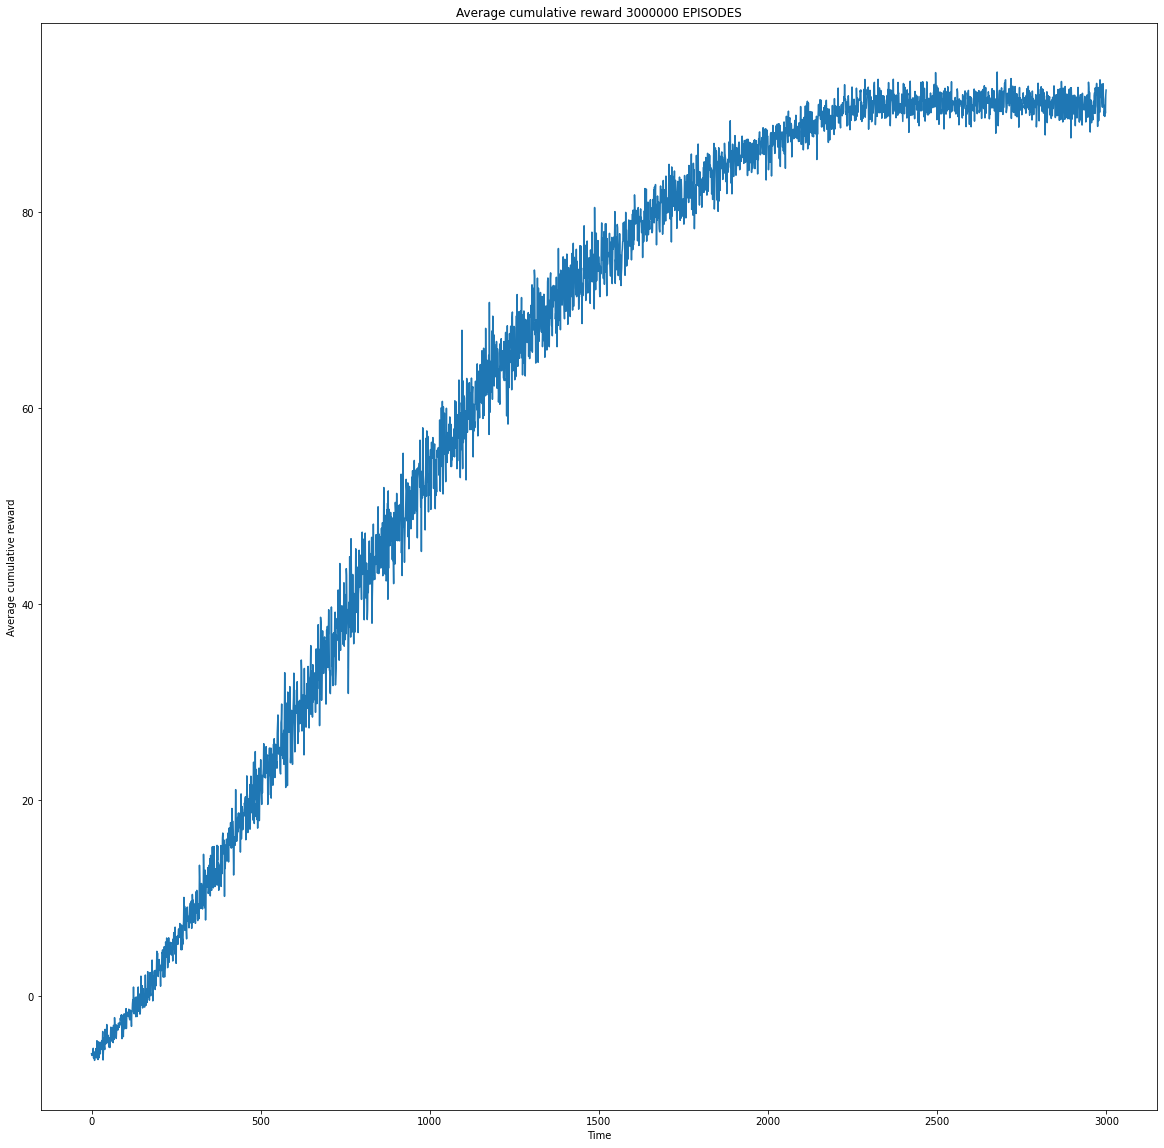

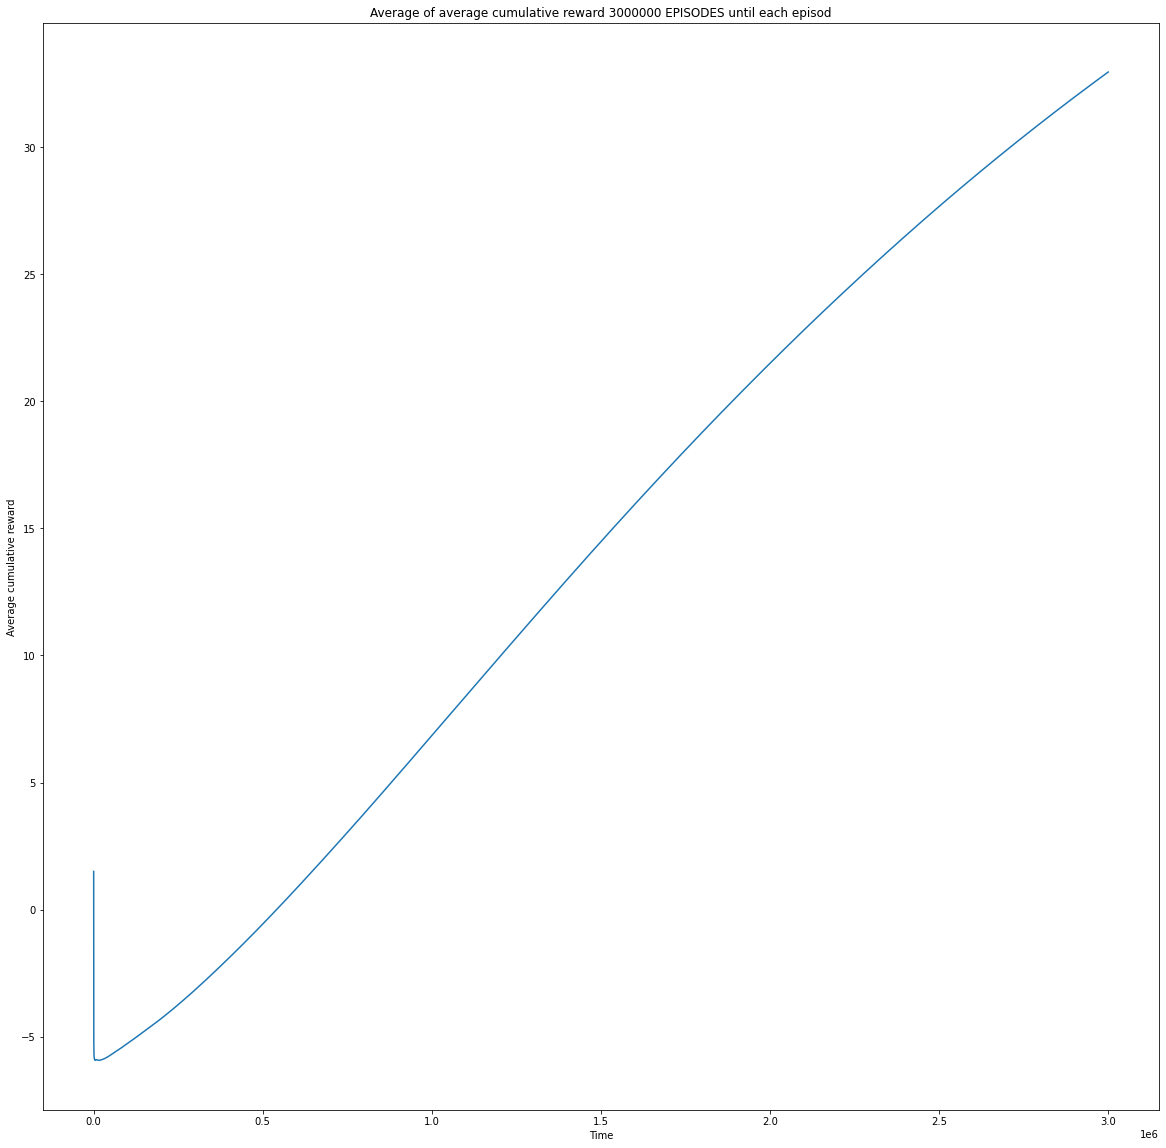

In [7]:
EPISODES = 3000000
EPSILON = 1
min_EPSILON = 0.1
DECAY = 0.999999
GAMMA = 0.9
LEARNING_RATE = 0.1
average_cumulative_rewards = []

def argmax(l):
    """ Return the index of the maximum element of a list
    """
    return max(enumerate(l), key=lambda x:x[1])[0]

def main():
    env = Ice()
    average_cumulative_reward = 0.0

    # Q-table, 4x4 states, 4 actions per state
    qtable = [[0., 0., 0., 0.] for state in range(4*4)]

    # Loop over episodes
    for i in range(EPISODES):
        state = env.reset()
        terminate = False
        cumulative_reward = 0.0

        global EPSILON
        EPSILON = max(min_EPSILON, EPSILON*DECAY)

        # Loop over time-steps
        while not terminate:
            # Compute what the greedy action for the current state is
            # UPDATED: We choose the best action in a state based on the q tabla
            a = argmax(qtable[state])

            # Sometimes, the agent takes a random action, to explore the environment
            if random.random() < EPSILON:
                a = random.randrange(4)

            # Perform the action
            next_state, r, terminate = env.step(a)

            # Update the Q-Table
            # UPDATED:
            Next_Best_Action = argmax(qtable[next_state])
            qtable[state][a] = qtable[state][a] + LEARNING_RATE * (r + GAMMA * qtable[next_state][Next_Best_Action] - qtable[state][a])

            # Update statistics
            cumulative_reward += r
            state = next_state

        # Per-episode statistics
        average_cumulative_reward *= 0.95
        average_cumulative_reward += 0.05 * cumulative_reward
        average_cumulative_rewards.append(average_cumulative_reward)
        if i % (EPISODES / 100) == 0:
            print(i, cumulative_reward, average_cumulative_reward, EPSILON)

    # Print the value table
    for y in range(4):
        for x in range(4):
            print('%03.3f ' % max(qtable[y*4 + x]), end='')

        print()

    average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)
    average_of_average_cumulative_reward_visualization(average_cumulative_rewards, EPISODES)

if __name__ == '__main__':
    main()
